## **Potatoes Leaf Disease Detections Using Deep Learning**
This script loads a pre-trained CNN model to classify potato leaf diseases from images. It processes a test image, makes predictions, and visualizes the results.

### **Summary of Steps**
1. **Import libraries** required for image processing and deep learning.  
2. **Load and process the test dataset** for model evaluation.  
3. **Load a pre-trained CNN model** for potatoes leaf disease detection.  
4. **Load a test image** and display it.  
5. **Preprocess the image** (convert to array and reshape).  
6. **Make predictions** using the trained model.  
7. **Find the predicted class** with the highest probability.  
8. **Display the result** with the image and disease name.

### **Step 1: Import Required Libraries**

In [5]:
# Imports necessary libraries for deep learning, image processing, and visualization
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import cv2  # OpenCV for image processing


### **Step 2: Load and Process the Test Dataset**

In [6]:
testing_path = "dataset/Test"

# Loads images from the test dataset, resizes them, and shuffles the data
testing_set = tf.keras.utils.image_dataset_from_directory(
    testing_path,
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True
)

# Retrieves class names from folder structure
class_name = testing_set.class_names  # Get class names
print("Class Names:", class_name)


Found 300 files belonging to 3 classes.
Class Names: ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


### **Step 3: Load the Trained CNN Model**

In [7]:
# Loads the trained Potatoes leaf disease Detections model from a saved file.
cnn = tf.keras.models.load_model('trained_potato_leaf_disease_model.keras')

### **Step 4: Load and Display a Test Image**

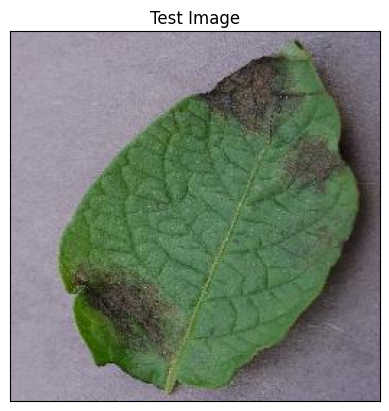

In [18]:
# Reads and displays a test image using OpenCV and Matplotlib.

# Loads an image from the test dataset
image_path = 'dataset\Test\Potato___Late_blight\9254f86d-5d83-4217-a7f5-84d08e1b93ee___RS_LB 4037.JPG'
img = cv2.imread(image_path) 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

# Displays the image
plt.imshow(img)  
plt.title('Test Image')
plt.xticks([])  # Hide x-axis labels
plt.yticks([])  # Hide y-axis labels
plt.show()


### **Step 5: Preprocess the Image for Model Prediction**

In [19]:
# Loads the image, resizes it, and converts it into a format suitable for the model.

# Loads the image and resizes it to 128×128 pixels (same as training size).
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128,128))

# Converts the image to an array (numerical format for deep learning)
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to batch format

### **Step 6: Make Predictions Using the Model**


In [20]:
# Feeds the preprocessed image into the model to obtain prediction probabilities.
predictions = cnn.predict(input_arr)
print("Raw Predictions:", predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Raw Predictions: [[0.00108616 0.9809518  0.01796205]]


### **Step 7: Determine the Predicted Class**

In [21]:
# Finds the index of the highest probability value in the prediction array.
result_index = np.argmax(predictions)
print(result_index)

1


#### **Step 8: Display Prediction Result**

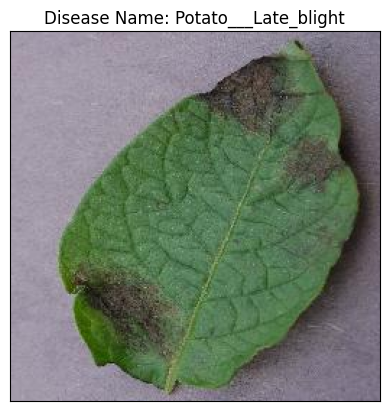

In [ ]:
# Displays the test image with the predicted disease name.
model_prediction = class_name[result_index]  # Get class name from index

# Show original image
plt.imshow(img)  

# Display predicted class
plt.title(f"Disease Name: {model_prediction}")  
plt.xticks([])  
plt.yticks([])
plt.show()

### **Conclusion:**
#### **This script loads a trained deep learning model, processes a test image, predicts the plant disease category, and visualizes the results.**